In [ ]:
## Primeiro vamos importar as bibliotecas iniciais para realizar a raspagem de dados, vamos começar com a biblioteca time, que iremos usar para definir o url mais pra frente.
## Vamos importar também a biblioteca pandas, pois ela que irá nos auxiliar a estruturar os dados que serão retornados do nosso web scrapping.
## A biblioteca BeautifulSoup para ajudar na estruturação do HTML que iremos utilizar.

In [59]:
import time
import pandas as pd
import bs4
from urllib.error import URLError, HTTPError
from urllib.request import Request, urlopen

In [165]:
## Vamos definir nossa primeira variável, sendo o URL que iremos fazer nossas requisições iniciais.
link_fixo = 'https://www.legislador.com.br//LegisladorWEB.ASP?WCI=ProposicaoTexto&ID=3&TPProposicao=1&nrProposicao=486&aaProposicao=2023'

## Logo de início já notamos que temos um padrão na URL acima, como Proposicao=486&aaProposicao=2023, se abrimos outra proposição, vemos que o padrão se mantém.
## Exemplo: https://www.legislador.com.br//LegisladorWEB.ASP?WCI=ProposicaoTexto&ID=3&TPProposicao=1&nrProposicao=485&aaProposicao=2023
## Vamos utilizar desse padrão mais pra frente, para definir nossa função de raspagem.


In [166]:
## Vamos criar uma função onde só irá retornar caso não dê nenhum erro na requisição

def ConsultaWebB(url):
    try:
        req = Request(url, headers = headers)
        response = urlopen(req)
        return response.read()

    except:
        pass

In [185]:
## Agora iremos criar a função onde iremos invocar o beatifulSoup.

def captura_html(url):
    html = ConsultaWebB(url)
    soup = bs4.BeautifulSoup(html, 'html.parser')    
    return soup

In [186]:
html = captura_html(link_fixo)
print(html.prettify())

<!DOCTYPE html>
<html>
 <head>
  <script async="" src="https://www.googletagmanager.com/gtag/js?id=G-FY3C7H7LWC">
  </script>
  <script>
   window.dataLayer = window.dataLayer || [];
function gtag(){dataLayer.push(arguments);}

gtag("js", new Date());
gtag("config", "G-FY3C7H7LWC");
  </script>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1, shrink-to-fit=no" name="viewport"/>
  <link href="legis.ico" rel="shortcut icon" type="image/x-ico"/>
  <title>
   Câmara Municipal de Indaial _ Indicação nº 486/2023 de 20/06/2023
  </title>
  <meta content="Câmara Municipal de Indaial _ Indicação nº 486/2023 de 20/06/2023" name="description">
   <link href="css/geral3.css" rel="stylesheet"/>
   <link href="https://d11gitgevq44cw.cloudfront.net/libs/font-awesome/5x/css/all.min.css" rel="stylesheet"/>
   <link crossorigin="anonymous" href="https://maxcdn.bootstrapcdn.com/bootstrap/4.0.0/css/bootstrap.min.css" integrity="sha384-Gn5384xqQ1aoWXA+058RXPxPg6fy4IWvTNh0E263

- Podemos ver que se inspecionarmos a página que desejamos raspar, vemos que as informações que desejamos estão dentro das tags <'dt'> e <'dd'>
- Sendo <'dt'> os 'títulos' das colunas que desejamos, e <'dd'> os dados. 
<br/>     
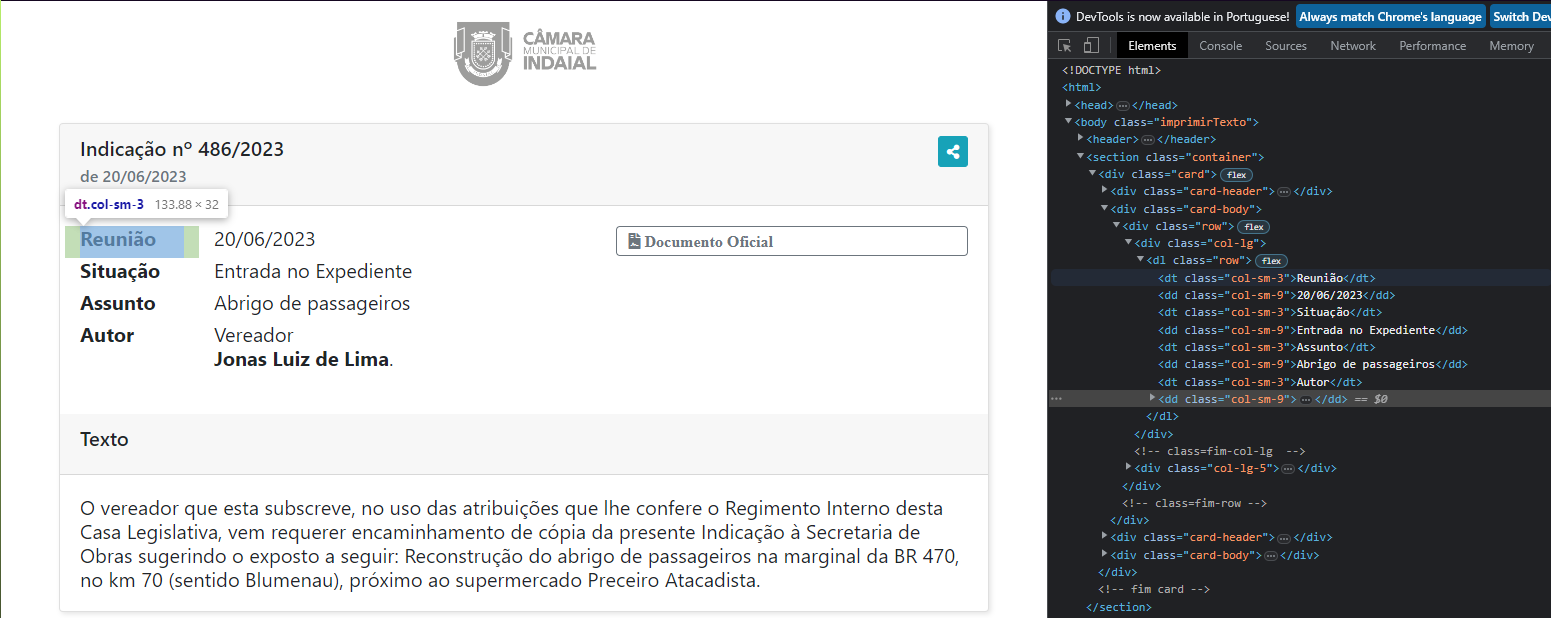 
<br/>    
- Porém também há a descrição da proposição em questão, que está localizada na tag <'p'> 
<br/>    
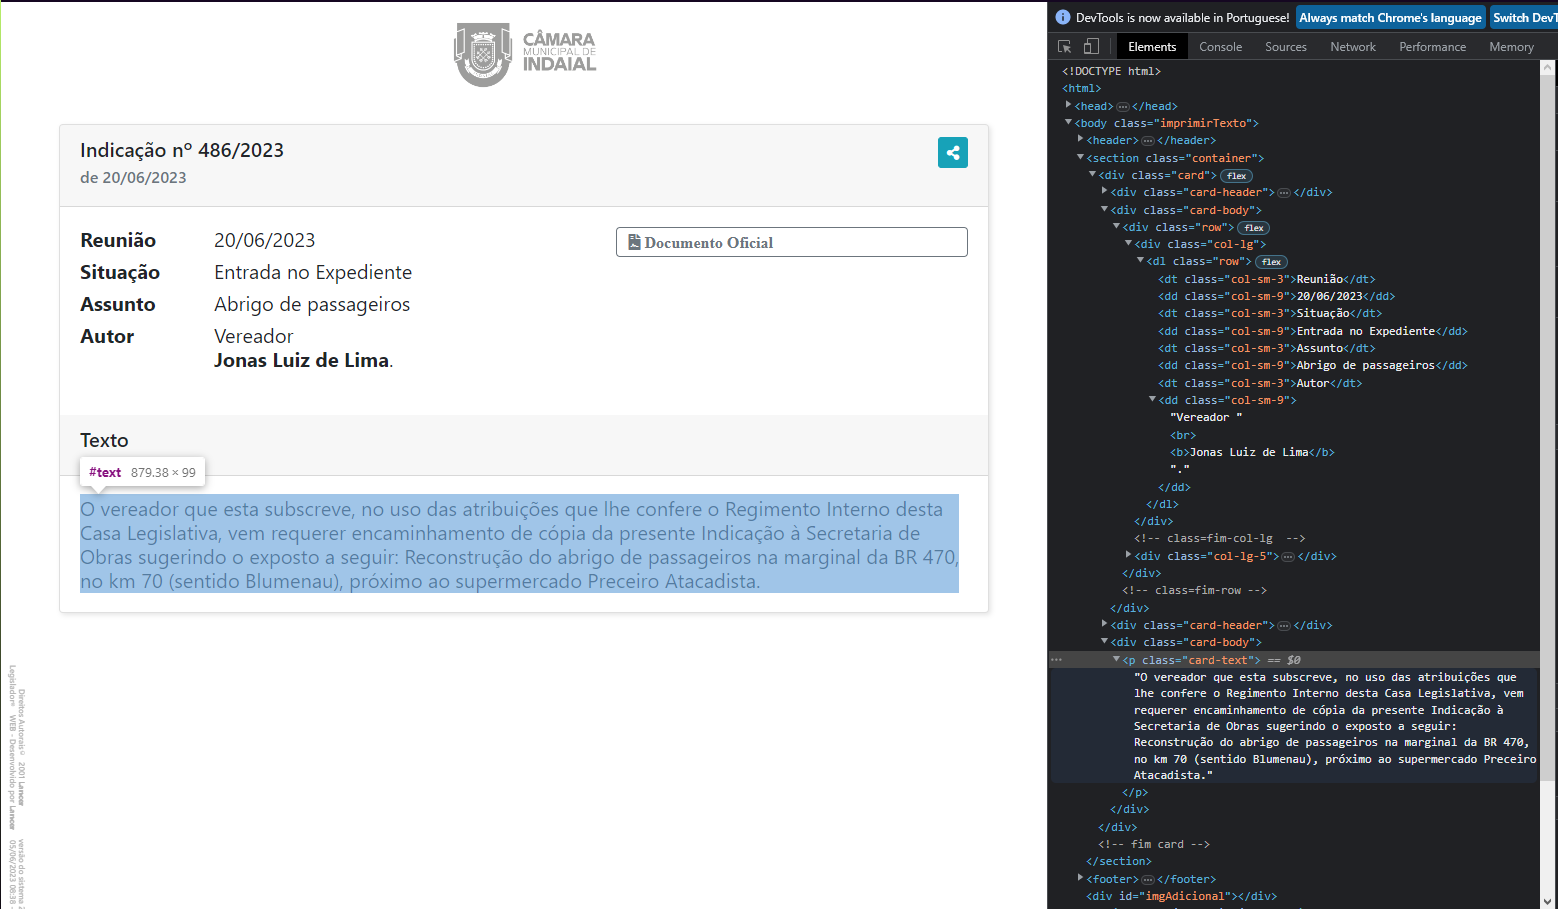

In [169]:
## Vamos procurar os dados com as tags de ('dt' e 'dd'), que por padrão é uma lista, sendo dd a descrição de dt.
html.findAll('dt')

[<dt class="col-sm-3">Reunião</dt>,
 <dt class="col-sm-3">Situação</dt>,
 <dt class="col-sm-3">Assunto</dt>,
 <dt class="col-sm-3">Autor</dt>]

In [170]:
html.findAll('dl')

[<dl class="row">
 <dt class="col-sm-3">Reunião</dt><dd class="col-sm-9">20/06/2023</dd>
 <dt class="col-sm-3">Situação</dt><dd class="col-sm-9">Entrada no Expediente</dd>
 <dt class="col-sm-3">Assunto</dt><dd class="col-sm-9">Abrigo de passageiros</dd>
 <dt class="col-sm-3">Autor</dt><dd class="col-sm-9">Vereador <br/><b>Jonas Luiz de Lima</b>.</dd>
 </dl>]

In [171]:
## Podemos chamar a função de get.text que iremos remover as tags, deixando somente o dado.
for n in html.findAll('dt'):
    print(n.get_text())

Reunião
Situação
Assunto
Autor


In [85]:
for n in html.findAll('dd'):
    print(n.get_text())

20/06/2023
Entrada no Expediente
Abrigo de passageiros
Vereador Jonas Luiz de Lima.


In [172]:
print(html.find('p').get_text())

O vereador que esta subscreve, no uso das atribuições que lhe confere o Regimento Interno desta Casa Legislativa, vem requerer encaminhamento de cópia da presente Indicação à Secretaria de Obras sugerindo o exposto a seguir: Reconstrução do abrigo de passageiros na marginal da BR 470, no km 70 (sentido Blumenau), próximo ao supermercado Preceiro Atacadista.


In [173]:
texto_preposicao = {
    'Texto': html.find('p').get_text()
}

print(texto_preposicao)

{'Texto': 'O vereador que esta subscreve, no uso das atribuições que lhe confere o Regimento Interno desta Casa Legislativa, vem requerer encaminhamento de cópia da presente Indicação à Secretaria de Obras sugerindo o exposto a seguir: Reconstrução do abrigo de passageiros na marginal da BR 470, no km 70 (sentido Blumenau), próximo ao supermercado Preceiro Atacadista.'}


In [213]:
## Vamos criar mais uma função, agora para em uma única função extrairmos todas as informações que queremos e passa-las para um dicionário.
def Dicionario(html):
    dt = html.find_all('dt')
    dd = html.find_all('dd')
    dic = {}
    for i in range(len(dt)):
        x = dt[i].get_text()
        y = dd[i].get_text()
        dic[x] = y
    dic['Texto'] = html.find('p').get_text()
    return dic

In [214]:
## Vamos conferir se todos os dados estão corretos nessa preposição, e depois vamos manipular o URL para extrair o máximo de proposições possíveis.
Dicionario(html)

{'Reunião': '20/06/2023',
 'Situação': 'Entrada no Expediente',
 'Assunto': 'Abrigo de passageiros',
 'Autor': 'Vereador Jonas Luiz de Lima.',
 'Texto': 'O vereador que esta subscreve, no uso das atribuições que lhe confere o Regimento Interno desta Casa Legislativa, vem requerer encaminhamento de cópia da presente Indicação à Secretaria de Obras sugerindo o exposto a seguir: Reconstrução do abrigo de passageiros na marginal da BR 470, no km 70 (sentido Blumenau), próximo ao supermercado Preceiro Atacadista.'}

In [215]:
def ProposicaoUrl(proposicao, ano):
    url = 'https://www.legislador.com.br//LegisladorWEB.ASP?WCI=ProposicaoTexto&ID=3&TPProposicao=1&nrProposicao='+str(proposicao)+'&aaProposicao='+str(ano)
    html = captura_html(url)
    dic = Dicionario(html)
    dic['Proposição'] = str(proposicao)
    dic['Ano'] = str(ano)
    return dic

In [216]:
## Vamos testar a função indicando novamente de forma manual a proposição e o ano dela.
ProposicaoUrl(100,2010)

{'Reunião': '01/02/2010',
 'Deliberação': '01/02/2010',
 'Situação': 'Proposição Aprovada',
 'Assunto': 'Limpeza, Macadamização, Patrolamento, Retificação; Alargamento',
 'Autor': 'Vereador Rubens Reinhold Ittner.',
 'Texto': 'Patrolamento e Macadamização do Beco ID 33, Bairro Estradinha, atendendo ao pedido de moradores, em especial do Sr. Orides Cardoso.\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0',
 'Proposição': '100',
 'Ano': '2010'}